# Project 2 report

In [75]:
# Imports
import numpy as np
import pandas as pd
import folium
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
#import plotly

# Params
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

# Q0: Basic EDA + Tidying

In [2]:
# Read in data
df = pd.read_csv('dft_rawcount_region_id_3.csv')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,931907,N,2019,2019-06-17,18,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,8,2,290,5,20,0,0,0,0,0,0,0,317
1,931907,S,2019,2019-06-17,13,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,1,1,258,4,36,4,2,0,1,0,0,7,306
2,931907,N,2019,2019-06-17,9,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,5,1,270,5,44,5,2,0,1,0,0,8,328
3,931907,S,2019,2019-06-17,12,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,2,2,266,4,50,2,5,0,2,0,0,9,331
4,931907,S,2019,2019-06-17,10,3,Scotland,29,City of Edinburgh,U,Minor,NaN,NaN,318480,675750,55.967806,-3.30758,NaN,NaN,4,0,247,8,35,2,3,0,3,0,0,8,298


In [4]:
df.describe(include='all')

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,279480.000000,279480,279480.000000,279480,279480.000000,279480.0,279480,279480.000000,279480,279480,279480,129832,129832,279480.000000,2.794800e+05,279480.000000,279480.000000,130180.000000,130180.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000,279480.000000
unique,NaN,5,NaN,1870,NaN,NaN,1,NaN,32,495,2,1102,1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,S,NaN,2018-09-10,NaN,NaN,Scotland,NaN,Fife,U,Minor,LA Boundary,LA Boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,73812,NaN,720,NaN,NaN,279480,NaN,18672,65220,149300,5092,6720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,523774.702462,NaN,2009.839717,NaN,12.500114,3.0,NaN,36.467626,NaN,NaN,NaN,NaN,NaN,295346.349921,7.115550e+05,56.282931,-3.684153,5.114988,3.178153,0.949953,1.621043,289.582002,5.314599,45.802057,11.047005,1.907321,1.589624,1.884825,4.141266,4.335520,24.905560,367.225261
std,447914.220640,NaN,5.797134,NaN,3.452059,0.0,NaN,23.418558,NaN,NaN,NaN,NaN,NaN,56623.729924,9.782121e+04,0.879098,0.921907,6.102640,3.792216,2.648190,3.392475,473.267874,9.445987,84.355333,23.660169,4.486867,4.527732,5.186480,13.185730,14.198993,57.849017,602.689129
min,700.000000,NaN,2000.000000,NaN,7.000000,3.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,70406.000000,5.390000e+05,54.721418,-7.443134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50763.000000,NaN,2005.000000,NaN,10.000000,3.0,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,257914.000000,6.612000e+05,55.832609,-4.275173,1.300000,0.810000,0.000000,0.000000,32.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
50%,811309.000000,NaN,2009.000000,NaN,13.000000,3.0,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,291905.000000,6.752400e+05,55.973501,-3.743832,2.700000,1.680000,0.000000,0.000000,126.000000,2.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,159.000000
75%,951133.000000,NaN,2015.000000,NaN,16.000000,3.0,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,334930.000000,7.418300e+05,56.562551,-3.042314,6.600000,4.100000,1.000000,2.000000,346.000000,6.000000,49.000000,11.000000,2.000000,1.000000,1.000000,2.000000,2.000000,20.000000,431.000000


### Removing unnecessary columns

In [40]:
df_tidy = df.copy() # Tidy dataset storage

# Cols to drop
rm_cols = ['region_id', 'region_name', 'local_authority_id', 'road_type',
           'start_junction_road_name', 'end_junction_road_name',
           'year', 'easting', 'northing', 'link_length_miles', 'hgvs_2_rigid_axle',
           'hgvs_3_rigid_axle', 'hgvs_3_or_4_articulated_axle',
           'hgvs_4_or_more_rigid_axle', 'hgvs_5_articulated_axle',
           'hgvs_6_articulated_axle']

# Drop cols
df_tidy.drop(rm_cols, axis=1, inplace=True)

### Renaming Vehicle Labels 

In [41]:
new_names = ['bikes', 'motorcycles', 'cars', 'buses', 'lgvs', 'hgvs'] # More interpretable labels
name_mappings = dict(zip(df_tidy.columns[8:-1], new_names)) # Creating dict of label mappings
df_tidy.rename(columns=name_mappings, inplace=True) # Renaming columns

### Tidy Transformations

In [42]:
# all_motor_vehicles --> all_vehicles (include bikes)
df_tidy['all_vehicles'] = df_tidy['bikes'] + df_tidy['motorcycles'] + df_tidy['cars'] + df_tidy['buses'] + \
                          df_tidy['lgvs'] + df_tidy['hgvs']

# New column for specifying whether road is: M, A, B, C, U
df_tidy = df_tidy.assign(
            road_type = lambda dataframe: dataframe['road_name'].map(lambda road_name: road_name[0]))

# Convert count_date to datetime format
df_tidy['count_date'] = pd.to_datetime(df['count_date'], format='%Y-%m-%d')

### Adding Population Data

In [43]:
# Read in population statistics
pop_df = pd.read_csv('scotland-mid-year-pop-est-19.csv', header=None)

# Rename columns
pop_df.rename(columns={0: 'local_authority_name', 1: 'population'}, inplace=True)

# Convert population to int
pop_df.population = pop_df.population.str.replace(',', '')
pop_df.population = pop_df.population.astype('int') 

# String replaces to avoid join issues
pop_df.local_authority_name = pop_df.local_authority_name.str.replace(' and ', ' & ')
pop_df.local_authority_name = pop_df.local_authority_name.str.replace('Na h-Eileanan Siar', 'Comhairle nan Eilean Siar')

# Overwrite df_tidy with full outer join with population data
df_tidy = pd.merge(df_tidy, pop_df, on='local_authority_name', how='outer')

In [44]:
df_tidy

,count_point_id,direction_of_travel,count_date,hour,local_authority_name,road_name,latitude,longitude,bikes,motorcycles,cars,buses,lgvs,hgvs,all_hgvs,all_motor_vehicles,all_vehicles,road_type,population
0,931907,N,2019-06-17,18,City of Edinburgh,U,55.967806,-3.307580,NaN,8,2,290,5,20,0,317,NaN,U,524930
1,931907,S,2019-06-17,13,City of Edinburgh,U,55.967806,-3.307580,NaN,1,1,258,4,36,7,306,NaN,U,524930
2,931907,N,2019-06-17,9,City of Edinburgh,U,55.967806,-3.307580,NaN,5,1,270,5,44,8,328,NaN,U,524930
3,931907,S,2019-06-17,12,City of Edinburgh,U,55.967806,-3.307580,NaN,2,2,266,4,50,9,331,NaN,U,524930
4,931907,S,2019-06-17,10,City of Edinburgh,U,55.967806,-3.307580,NaN,4,0,247,8,35,8,298,NaN,U,524930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279475,990749,W,2000-05-19,14,Inverclyde,C,55.944822,-4.788429,NaN,0,3,87,18,12,0,120,NaN,C,77800
279476,990749,W,2000-05-19,15,Inverclyde,C,55.944822,-4.788429,NaN,0,0,91,22,12,0,125,NaN,C,77800
279477,990749,W,2000-05-19,16,Inverclyde,C,55.944822,-4.788429,NaN,0,0,95,17,5,0,117,NaN,C,77800
279478,990749,W,2000-05-19,17,Inverclyde,C,55.944822,-4.788429,NaN,0,1,121,17,5,0,144,NaN,C,77800


# Q1: Bar chart of [X] longest roads showing start and end locations

### Method
* Filter by distinguishing road name 
* Ignore U and C roads 
* We have start and end junctions (general locations)
* How do we calculate distance?
    1. Add up link lengths
    2. Verify with Google Maps



# Q2: Local authorities managing number of roads - mapviz - fixed point in time

### Outcome
* 2019 map of roads managed
* Static map of Scotland with gradient colour scheme

### Method
* Group by `local_authority_name`, `count_id`
* Break down total number of roads per authority into `road_names`
* Possible weight matrix to give larger, busier roads a larger influence in the map - don't want to give U and C thes same weighting as M and A roads
* In `road_name` variable, cut string such that it's only a single character

### Stretch and Challenge
* Maintenance data to observe which authority spends the most on maintainance

### Extra Packages:
* folium
* geopandas

In [153]:
map_cols = ['count_point_id', 'local_authority_name', 'count_date', 'road_name', 'hour', 'direction_of_travel', 'latitude', 'longitude', 'population']
map_df = df_tidy[map_cols]
map_df.local_authority_name = map_df.local_authority_name.str.replace('&', 'and')
map_df.local_authority_name = map_df.local_authority_name.str.replace('Comhairle nan Eilean Siar', 'Eilean Siar')

In [156]:
auth_geo = os.path.join(os.getcwd(), 'local_auth.json')
with open(auth_geo) as f:
    scotland_topo = json.load(f)

topo_names = []
for i in range(32):
    topo_names.append(scotland_topo['objects']['lad']['geometries'][i]['properties']['LAD13NM'])

auth_geo

'/Users/callum/pp-project-2-group22/local_auth.json'

In [224]:
scotland = folium.Map(location=[57.8906712, -4.2026458], zoom_start=6.25, tiles='cartodbdark_matter')

In [225]:
folium.Choropleth(geo_data = scotland_topo,                  #json
    topojson = 'objects.lad',
    key_on ='feature.properties.LAD13NM',
    data = map_df,
    columns = ['local_authority_name', 'population'], #columns to work on
    name ='choropleth',                                   
    fill_color ='YlGnBu',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.7,
    line_opacity = 0.2,
).add_to(scotland)

In [226]:
scotland

In [217]:
folium_map = folium.Map(location=[19, 80],
                        zoom_start=4,
                        tiles="CartoDB dark_matter")
folium.Choropleth(geo_data=states_topo,
             topojson='objects.India_States_2020_compressed',
             key_on='feature.properties.state_name',
             data=df, # my dataset
             columns=['st_nm','count'], 
             fill_color='GnBu', 
             fill_opacity=0.7, 
             line_opacity=0.5).add_to(folium_map)
data=df, # my dataset
             columns=['st_nm','count'], 
             fill_color='GnBu', 
             fill_opacity=0.7, 
             line_opacity=0.5).add_to(folium_map)
folium_map


IndentationError: unexpected indent (<ipython-input-217-8d2ff3262a8f>, line 13)

# Q3: Interactive visualization of the distribution of vehicles over each type of road over the past [X] years

### Outcome
* x-axis: discrete vehicle type data e.g.  cars, bikes, buses, hgvs, lgvs etc
* y-axis: type of road e.g. M, A, B, C, U
* Scatter point for each category where size indicates prevalence of that type of vehicle on that type of road
* Slider which shows variation of data over [X] years


### Method
* Group C and U roads
* Normalize scatter points by \pi*R^2


### Stretch and Challenge
* We have dotted line outline of average of previous 5 years giving the reader some indication of growth/reduction
* x-axis: as emojis


### Extra packages
* plotly - used to vary the datapoints



In [ ]:
df_tidy

# Q4: Time of day viz?

### Outcome
* x-axis: Hours of the day (07:00 - 18:00)
* y-axis-1: `all_vehicles`
* y-axis-2: types of vehicle (faceted plot)
* Light alpha filled densities

### Method
* Get hours day
* Group vehicle count by hour type
* Further subset those counts by vehicle

In [11]:
tod_df = df_tidy[['hour'] + new_names] # Extracting relevant variables
tod_df = tod_df.groupby('hour').sum() # Find total counts of each vehicle at every hour
tod_df.reset_index(inplace=True)
tod_df = tod_df.melt(id_vars='hour', var_name='vehicle_type') # Pivot longer
tod_df.vehicle_type = tod_df.vehicle_type.astype('category') 

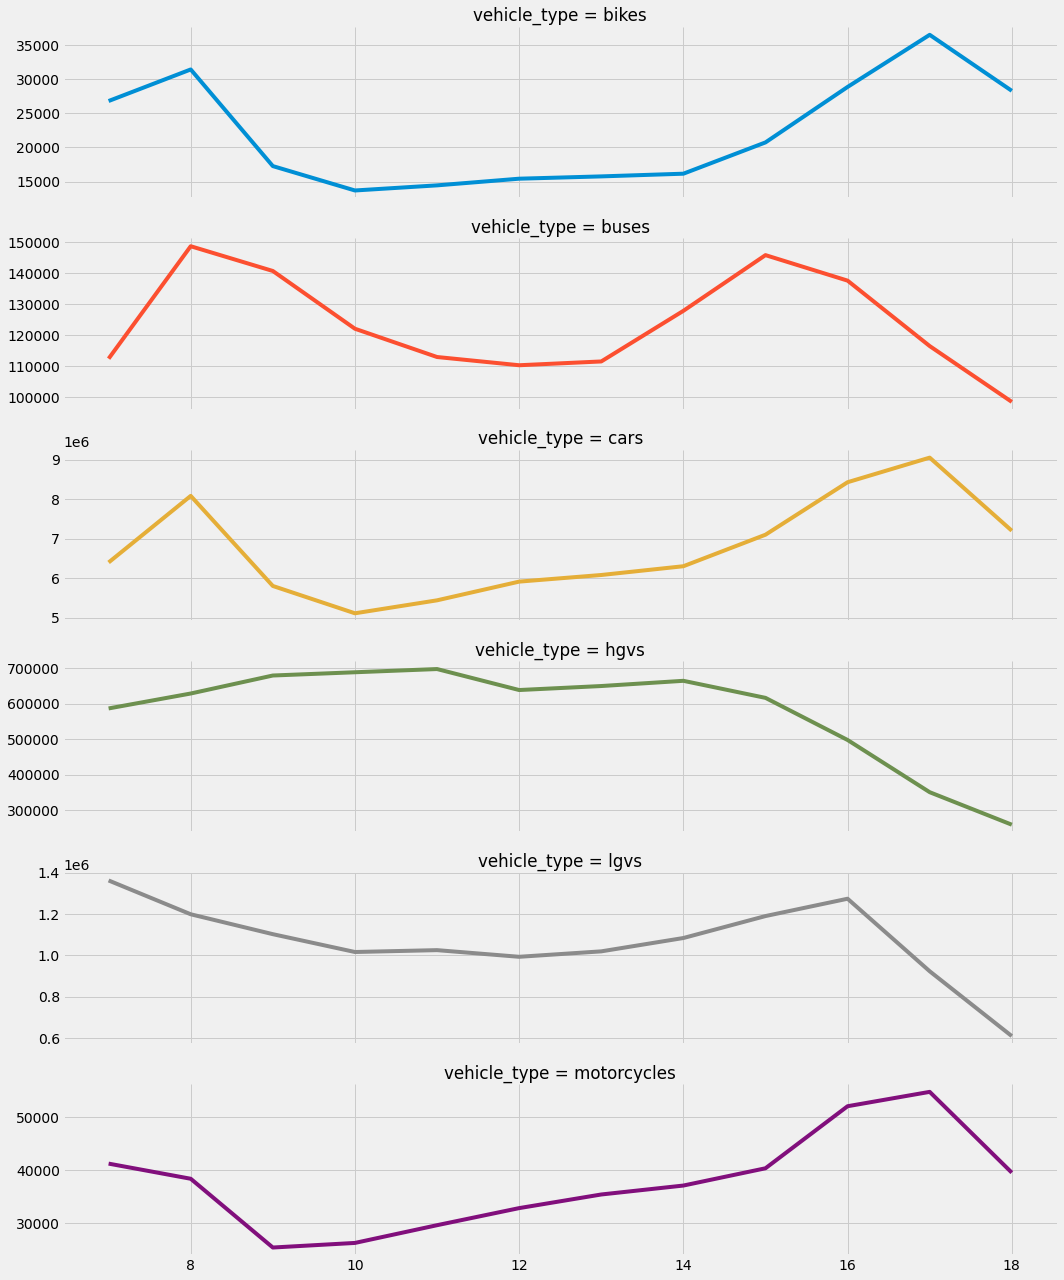

In [12]:
plt.style.use('fivethirtyeight')
g = sns.FacetGrid(data=tod_df, col='vehicle_type', height=3, col_wrap=1, 
                  sharex=True, sharey=False, aspect=5)
g = g.map_dataframe(sns.lineplot, x='hour', y='value', hue ='vehicle_type')

In [13]:
x = tod_df.hour.unique()
y1 = tod_df.loc[tod_df.vehicle_type=='cars']['value']
y2 = tod_df.loc[tod_df.vehicle_type=='lgvs']['value']
y3 = tod_df.loc[tod_df.vehicle_type=='hgvs']['value']
y4 = tod_df.loc[tod_df.vehicle_type=='buses']['value']
y5 = tod_df.loc[tod_df.vehicle_type=='motorcycles']['value']
y6 = tod_df.loc[tod_df.vehicle_type=='bikes']['value']
y = [y1, y2, y3, y4, y5, y6]

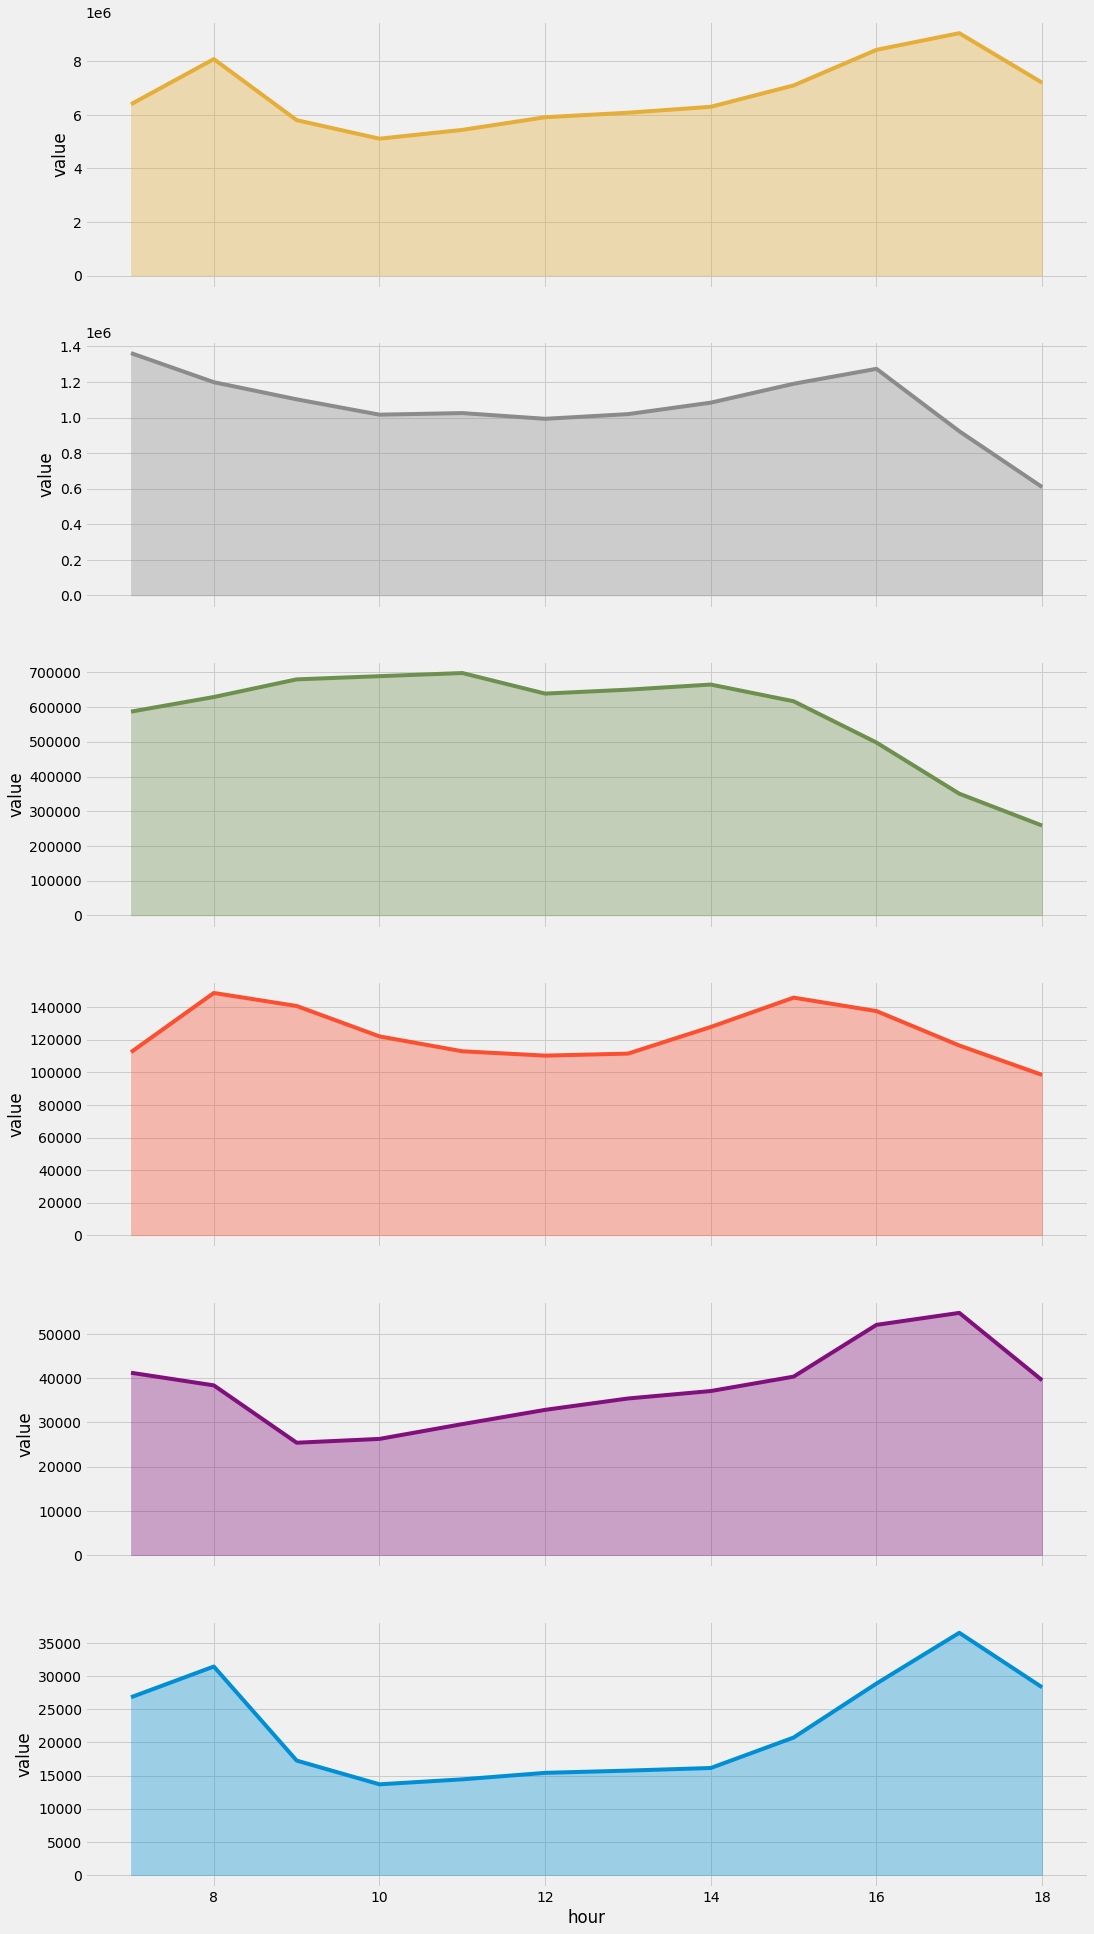

In [39]:
fig, axes = plt.subplots(6, 1, sharex=True, sharey=False, figsize=(16, 32))
hues = ['#e5ae38', '#8b8b8b', '#6d904f', '#fc4f30', '#810f7c', '#008fd5']
for i, ax in enumerate(axes):
    sns.lineplot(data=tod_df, x='hour', y=y[i], ax=ax, hue='vehicle_type')
    ax.fill_between(x, y[i], color=hues[i], alpha=0.35)
    ax.get_legend().remove()

### TODOs for Q4:

* Add all hours to x-axis
* Format y-axis, and change labels
* Add hover on hour points to read values
* Display legend of colour <--> vehicle_type

# Q5: Bikes per capita per local authority 

### Caveats
1. Count data of bikes is assumed to be representative of the prevalence of bikes in the authority
2. A bike count within a local authority maps to that bike actually belonging to that authority
3. Double counting effects are ignored

This is because bikes are not registered vehicles and hence this assumption has to be made. We think this is a reasonable assumption since bikes are used for micro-mobility in the majority of cases.

### Outcome
* Horizontal bar chart ordered in descending order

### Method
* Get population data and store in tidy dataframe
* Plot the data

## Additional
* Encode or visualise population data



In [10]:
bikes_cols = ['local_authority_name', 'bikes', 'population']

df_bikes = df_tidy[bikes_cols]

In [11]:
def div_series(df):
    return df['bikes'].sum() / float(df['population'].sum())

In [12]:
pop_df

,local_authority_name,population
0,Aberdeen City,228670
1,Aberdeenshire,261210
2,Angus,116200
3,Argyll & Bute,85870
4,City of Edinburgh,524930
5,Clackmannanshire,51540
6,Dumfries & Galloway,148860
7,Dundee City,149320
8,East Ayrshire,122010
9,East Dunbartonshire,108640


In [13]:
bikes_per_capita = df_bikes.groupby(['local_authority_name'], as_index=True).apply(div_series).sort_values(ascending=False)

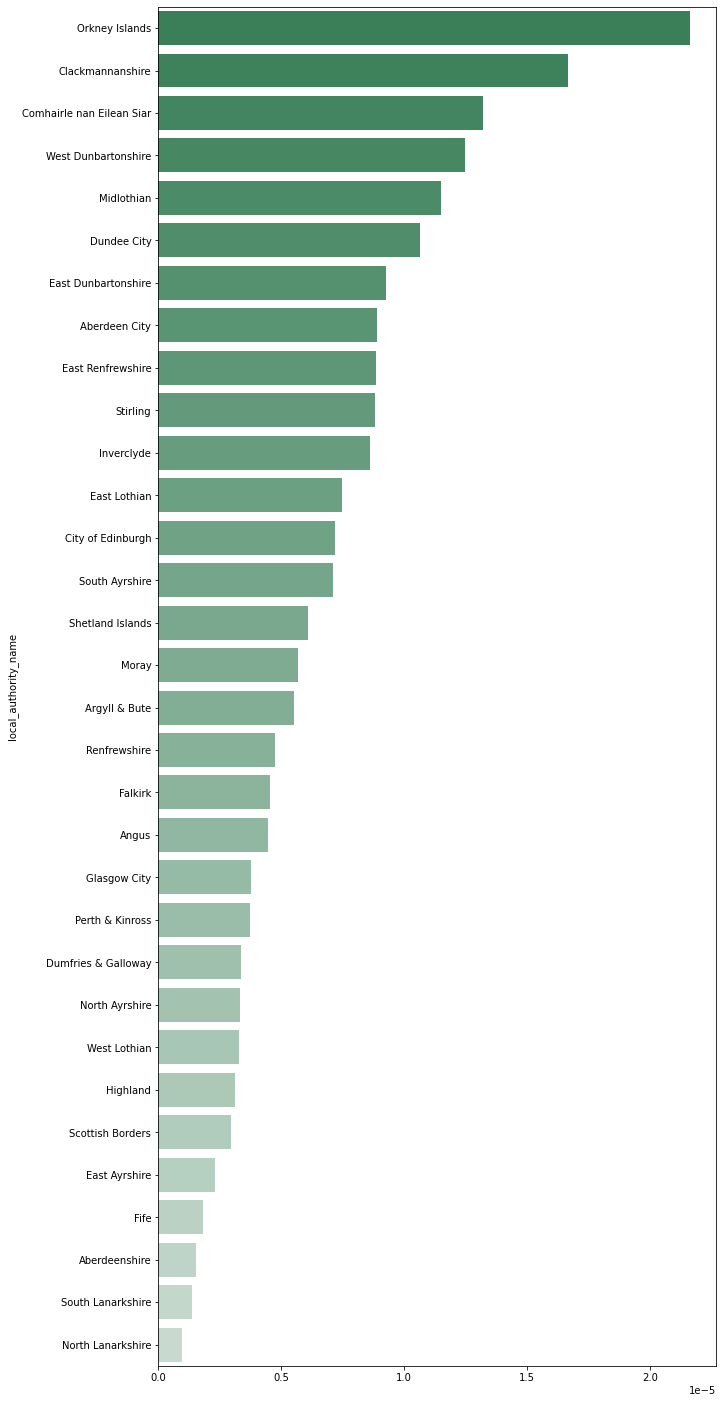

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 25))
pal = sns.light_palette("seagreen", n_colors=40, reverse=True)
sns.barplot(x = bikes_per_capita, y = bikes_per_capita.index, palette=pal)
plt.show()

In [ ]:
# BONUS!

# Create tidy dataframe for bikes only

df_tidy.head()

# Extract: bikes, count_date, hour
bikes_cols = ['count_date', 'hour', 'bikes']
df_bikes = df_tidy[bikes_cols]

# Transform: count_date --> weekday
df_bikes['weekday'] = df_bikes['count_date'].dt.day_name()
df_bikes.groupby(['weekday', 'hour']).sum()

In [ ]:
sns.set_style()